In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
data = pd.read_csv("dataset\customer_churn_dataset-training-master.csv")

data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [55]:
# random_data = data.sample(10000)

churn_0 = data[data['Churn'] == 0]
churn_1 = data[data['Churn'] == 1]

random_data = pd.concat([
    churn_1.sample(7000),
    churn_0.sample(3000)
]).sample(frac=1).reset_index(drop=True)


random_data['Churn'].value_counts()

Churn
1.0    7000
0.0    3000
Name: count, dtype: int64

In [56]:
random_data.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,420399.0,49.0,Female,47.0,16.0,4.0,6.0,Premium,Annual,745.58,11.0,0.0
1,186393.0,19.0,Male,58.0,12.0,0.0,18.0,Basic,Monthly,377.00,18.0,1.0
2,329257.0,42.0,Female,41.0,16.0,4.0,14.0,Basic,Annual,986.25,4.0,0.0
3,219074.0,59.0,Male,16.0,3.0,3.0,5.0,Premium,Annual,991.28,27.0,1.0
4,93713.0,52.0,Male,44.0,12.0,4.0,17.0,Standard,Annual,563.00,24.0,1.0


In [65]:
print(random_data.isnull().sum())
print("\n\n")
print(random_data.isna().sum())

# There are no null entries in this dataset.

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64



CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [58]:
random_data.duplicated().sum()

# There are no duplicate entries in this dataset

0

In [59]:
random_data.to_csv("dataset/random_data.csv", index=False)

['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']


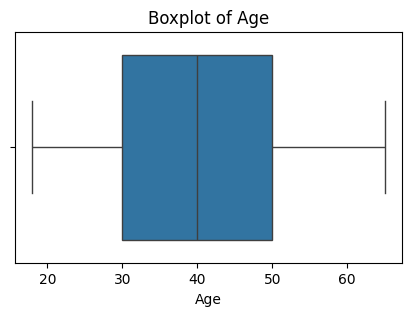

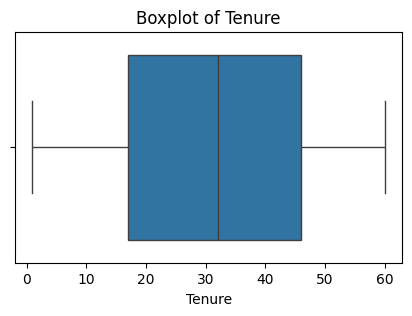

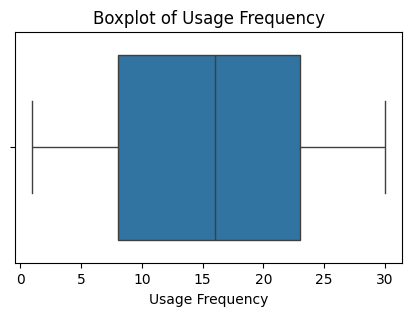

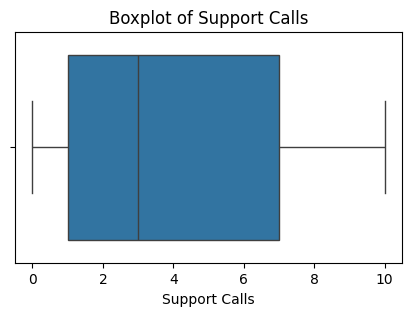

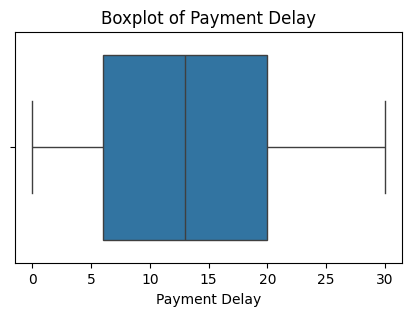

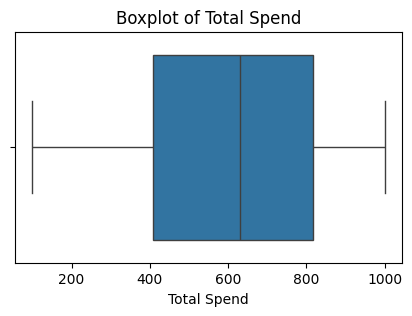

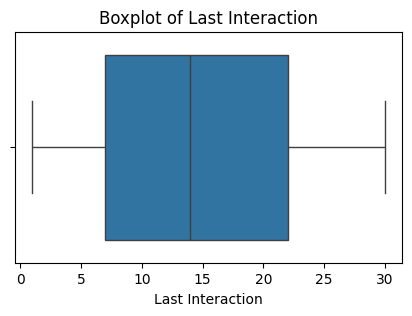

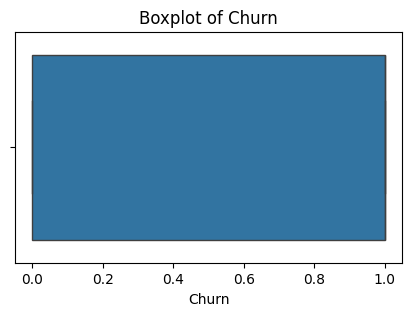

In [60]:
cols = list(random_data.columns)
cols.remove('CustomerID')
cols.remove('Gender')
cols.remove('Subscription Type')
cols.remove('Contract Length')
print(cols)

for col in cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=random_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


From the above boxplots we can see there are no outliers in any column. If there were outliers we would have removed them.